# 「同期・引き込み現象について」課題【解答例】

以下はPythonを使って同期現象を蔵本モデルに従ってシミュレーションしてみた結果である。IPythonNotebookが使えるなら、このファイルをダウンロードしてスライダーを動かして適当なパラメータを代入した上でシミュレーションを試してみよ。

- 2つのメトロノームを用いて、実際に同期現象を確認せよ。どのような実験の設定にすると同期を見ることができるだろうか?

(略)

- 同期現象をうまく説明する単純なモデルとして、蔵本モデルと呼ばれる、平均場を仮定し相互作用が位相差の正弦関数で表されるようなものが考えられている:  
$$\dot{\theta_{i}} = \omega_{i} + \frac{K}{N}\sum_{i=1}^{N}\sin(\theta_{j}-\theta_{i}),\ \ \ i=1,2,\dots ,N$$  
この蔵本モデルにおいて$N=2$として、$\omega_{i},K$に適当なパラメータと初期値$\theta_{1}(0), \theta_{2}(0), \dot{\theta_{1}}, \dot{\theta_{2}}$を定め、ひとつの場合について相空間上に各時刻での位置を振動子に関して色を変えて重ねてプロットしてみよ。得られた軌跡の定性的な特徴は何であろうか?

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.html.widgets import interactive
from IPython.html import widgets
from IPython.display import display
import numpy as np

pi = np.pi
sin = np.sin
exp = np.exp
h = 0.1

def pipi(rad):
    return (rad + pi) % (2*pi) - pi

def master(after, widget=True, parameter=None):
    def main(params):
        theta1 = [[params[0],], [params[2],]]
        theta2 = [[params[1],], [params[3],]]
        omega = (params[4], params[5])
        K = params[6]
        T = params[7]
        t = 1
        while t < T:
            theta1[0].append((theta1[0][-1] + theta1[1][-1]*h))
            theta2[0].append((theta2[0][-1] + theta2[1][-1]*h))
            theta1[1].append(omega[0] + (K/2.)*sin(theta2[0][-1]-theta1[0][-1]))
            theta2[1].append(omega[1] + (K/2.)*sin(theta1[0][-1]-theta2[0][-1]))
            t += 1
        result = [theta1, theta2, omega, K, T]
        return after(*result)
    
    # assgin values
    def assign(th1=0.1, th2=0.5, v1=1., v2=1., ome1=1., ome2=1.1, K=0.09, T=100):
        global params
        params = [th1, th2, v1, v2, ome1, ome2, K, T]
    
    if widget:
        var = {
            "th1": (-3.14, 3.14, 0.01),
            "th2": (-3.14, 3.14, 0.01),
            "v1": (-6., 6.),
            "v2": (-6., 6.),
            "ome1": (-2., 2., 0.01),
            "ome2": (-2., 2., 0.01),
            "K": (-1., 1., 0.01),
            "T": (50, 2000, 50),
        }

        # Put Widgets
        w = interactive(assign, **var)
        button = widgets.Button(description="Click Me!")
        display(w)
        display(button)

        def on_button_clicked(b):
            print("Simulation Start...")
            print("param {0}".format(params))
            main(params)

        button.on_click(on_button_clicked)
    else:
        return main(parameter)

Simulation Start...
param [0.1, 0.5, 1.0, 1.0, 1.0, 1.1, 0.2, 1050]


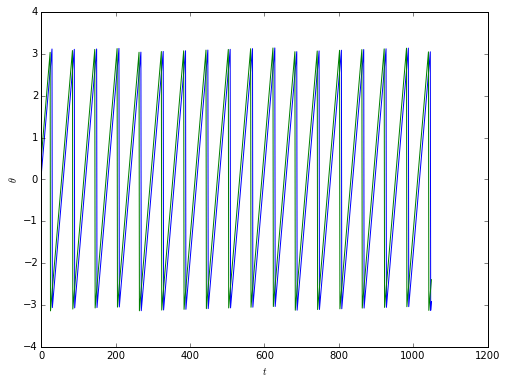

In [9]:
def simple_plot(theta1, theta2, omega, K, T):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.plot(range(T), map(pipi, theta1[0]))
    ax.plot(range(T), map(pipi, theta2[0]))
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\theta$')
    plt.show()

master(simple_plot)

$\theta_{1}-\theta_{2}$(位相差)の時間プロット($-\pi \le \theta_{i}\le \pi$とする)

Simulation Start...
param [0.1, 0.5, 1.0, 1.0, 1.0, 1.1, 0.75, 2000]


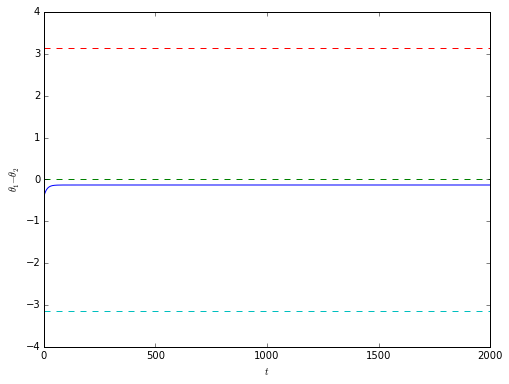

In [10]:
def phase_difference(theta1, theta2, omega, K, T):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.plot(range(T), [pipi(t1-t2) for t1,t2 in zip(theta1[0], theta2[0])])
    ax.plot([0, T], [0]*2, '--')
    ax.plot([0, T], [pi]*2, '--')
    ax.plot([0, T], [-pi]*2, '--')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\theta_{1} - \theta_{2}$')
    plt.show()

master(phase_difference)

相空間上での振る舞い

Simulation Start...
param [0.1, 0.5, 1.0, 1.0, 1.0, 1.1, 0.1, 1800]


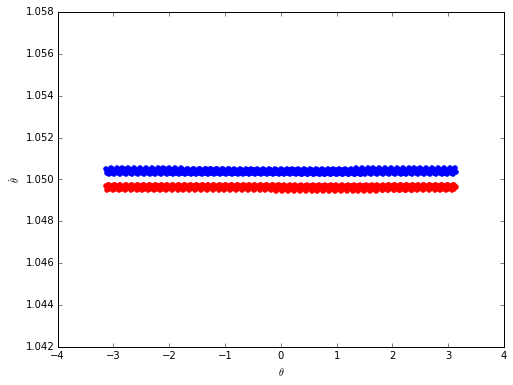

In [11]:
def phase_space(theta1, theta2, omega, K, T):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    t_use = int(T/3)
    ax.scatter(map(pipi, theta1[0][-t_use:]), theta1[1][-t_use:], color='r')
    ax.scatter(map(pipi, theta2[0][-t_use:]), theta2[1][-t_use:], color='b')
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$\dot{\theta}$')
    plt.show()

master(phase_space)

- 適当なパラメータを選ぶと、ある有限時間の後に2つの振動子は同期する。同期している状態と、そうでない状態を見分けるのに用いられる指標として、振動子の位相を円周上に考えた時のその重心の位置が挙げられる。2つの振動子が完全に同相同期している時には、この重心の円の中心からの距離$R$は円の半径に等しくなるはずである。円運動している円の半径を$1$として$K$を横軸、縦軸に$R$をとって、同期相転移が起こる相転移点$K_{c}$を概算せよ。

オーダーパラメーター(秩序変数)$R$を求める。蔵本先生の定義したオーダーパラメータは

$$Re^{i\phi} = \frac{1}{N}\sum_{j=1}^{N} e^{i\theta_{j}}$$

ここで、$\phi$はすべての振動子の位相の平均であり、$R$は振動子の個数のコヒーレンスを表している。

2振動子の今の場合、上のオーダーパラメータをあらわに書くと

$$R = \left| \frac{1}{2} (e^{i\theta_{1}} + e^{i\theta_{2}}) \right|$$

のようになる。

Simulation Start...
param [0.1, 0.5, 1.0, 1.0, 1.0, 1.1, 0.09, 2000]


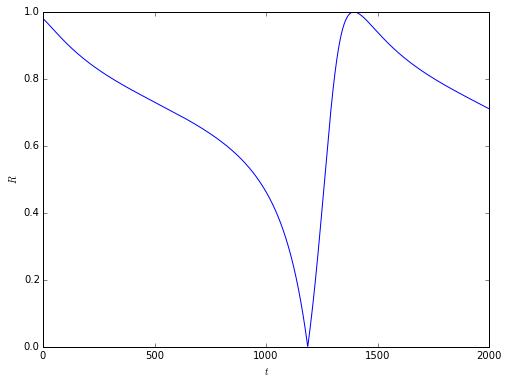

In [12]:
def order_parameter2(theta1, theta2, omega, K, T):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    th1 = np.array(map(pipi, theta1[0]))
    th2 = np.array(map(pipi, theta2[0]))
    R = abs(0.5 * (exp(1j*th1) + exp(1j*th2)))
    ax.plot(range(T), R)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$R$')
    plt.show()

master(order_parameter2)

In [13]:
def K_R(r_function):
    def assign2(ome1=1., ome2=1.1, Kmax=0.2, T=10000, t_ave=3000):
        global parameter
        parameter = [0.1, 0.5, 1., 1., ome1, ome2, Kmax, T, t_ave]

    var = {
        "ome1": (-2., 2., 0.01),
        "ome2": (-2., 2., 0.01),
        "Kmax": (0., 0.4, 0.001),
        "T": (1000, 20000, 1000),
        "t_ave" : (100, 5000, 100),
    }

    # Put Widgets
    w = interactive(assign2, **var)
    button = widgets.Button(description="Click Me!")
    display(w)
    display(button)

    def on_button_clicked2(b):
        print("Simulation Start...")
        print("param {0}".format(parameter))
        Rs = []
        T = parameter[7]
        t_ave = parameter[8]
        K = np.linspace(0., parameter[6], 100)
        for k in K:
            var = parameter[0:6] + [k, T]
            def after(theta1, theta2, omega, K, T):
                th1 = np.array(map(pipi, theta1[0]))
                th2 = np.array(map(pipi, theta2[0]))
                r = r_function(th1, th2)
                return np.average(r[-t_ave:])

            Rs.append(master(after, widget=False, parameter=var))

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111)
        ax.plot(K, Rs)
        ax.set_xlabel(r'$K$')
        ax.set_ylabel(r'$R$')
        plt.show()

    button.on_click(on_button_clicked2)

Simulation Start...
param [0.1, 0.5, 1.0, 1.0, 1.0, 1.1, 0.2, 10000, 3000]


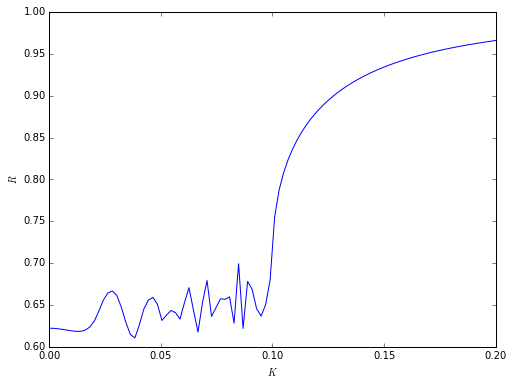

In [14]:
def r_function2(th1, th2):
    return abs(0.5 * (np.exp(1j*th1) + np.exp(1j*th2)))

K_R(r_function2)

なぜ$K=0$で$R=0$とならないか?$\Rightarrow$振動子の数が2個であることから分かる。そもそものオーダーパラメータの定義としては$N\rightarrow \infty$の極限を考えていることに注意。